In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import idx2numpy
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']= [20,6]

In [3]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate, cross_val_score, KFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,precision_score,accuracy_score,classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.pipeline import Pipeline

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten

In [5]:
import mlflow
import mlflow.sklearn
import mlflow.keras
# import keras

In [6]:
# Training/Validation and Testing Data
tr_image_file = 'data/train-images-idx3-ubyte'
tr_label_file = 'data/train-labels-idx1-ubyte'
ts_image_file = 'data/t10k-images-idx3-ubyte'
ts_label_file = 'data/t10k-labels-idx1-ubyte'

tr_images = idx2numpy.convert_from_file(tr_image_file)
tr_labels = idx2numpy.convert_from_file(tr_label_file)
ts_images = idx2numpy.convert_from_file(ts_image_file)
ts_labels = idx2numpy.convert_from_file(ts_label_file)

tr_images.shape, tr_labels.shape, ts_images.shape, ts_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

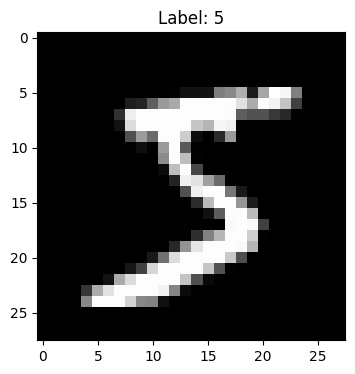

In [7]:
plt.rcParams['figure.figsize']= [10,4]

plt.imshow(tr_images[0], cmap='gray')
plt.title(f'Label: {tr_labels[0]}')
plt.show()

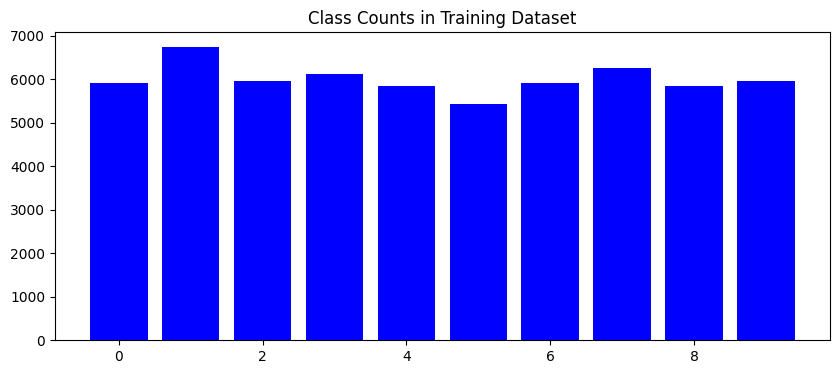

In [8]:
#Checking Class Imbalance
class_counts = Counter(tr_labels).most_common()
x = [i[0] for i in class_counts]
y = [i[1] for i in class_counts]
plt.bar(x,y,color='b')
plt.title('Class Counts in Training Dataset');

In [9]:
#Flatten Data
tr_images = tr_images.reshape(-1, 784)
ts_images = ts_images.reshape(-1, 784)

tr_images.shape, ts_images.shape

((60000, 784), (10000, 784))

In [10]:
X_tr, X_val, y_tr, y_val = train_test_split(tr_images,tr_labels,test_size=0.1)

X_tr.shape, y_tr.shape, X_val.shape, y_val.shape

((54000, 784), (54000,), (6000, 784), (6000,))

In [11]:
#Standardize Data - Training/Validation
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_val_scaled = scaler.transform(X_val)

In [12]:
#Standardize Data - Testing
scaler = StandardScaler()
tr_images_scaled = scaler.fit_transform(tr_images)
ts_images_scaled = scaler.transform(ts_images)

In [13]:
model = Sequential()
model.add(Dense(128, input_shape = (784,), activation='relu'))
model.add(Dropout(0.2,seed =0))
model.add(Dense(10,activation='softmax'))

sgd = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.01,
    momentum=0.0)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model.fit(X_tr_scaled, y_tr, validation_data=(X_val_scaled, y_val),
                    batch_size = 32, epochs=15, verbose=True)

Epoch 1/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5111 - accuracy: 0.8531 - val_loss: 0.2885 - val_accuracy: 0.9220
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2714 - accuracy: 0.9189 - val_loss: 0.2344 - val_accuracy: 0.9352
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2232 - accuracy: 0.9332 - val_loss: 0.2083 - val_accuracy: 0.9457
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1956 - accuracy: 0.9416 - val_loss: 0.1929 - val_accuracy: 0.9492
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1744 - accuracy: 0.9464 - val_loss: 0.1830 - val_accuracy: 0.9535
Epoch 6/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1599 - accuracy: 0.9516 - val_loss: 0.1711 - val_accuracy: 0.9580
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1481 - accuracy: 0.9552 - val_loss: 0.1655 - val_accuracy:

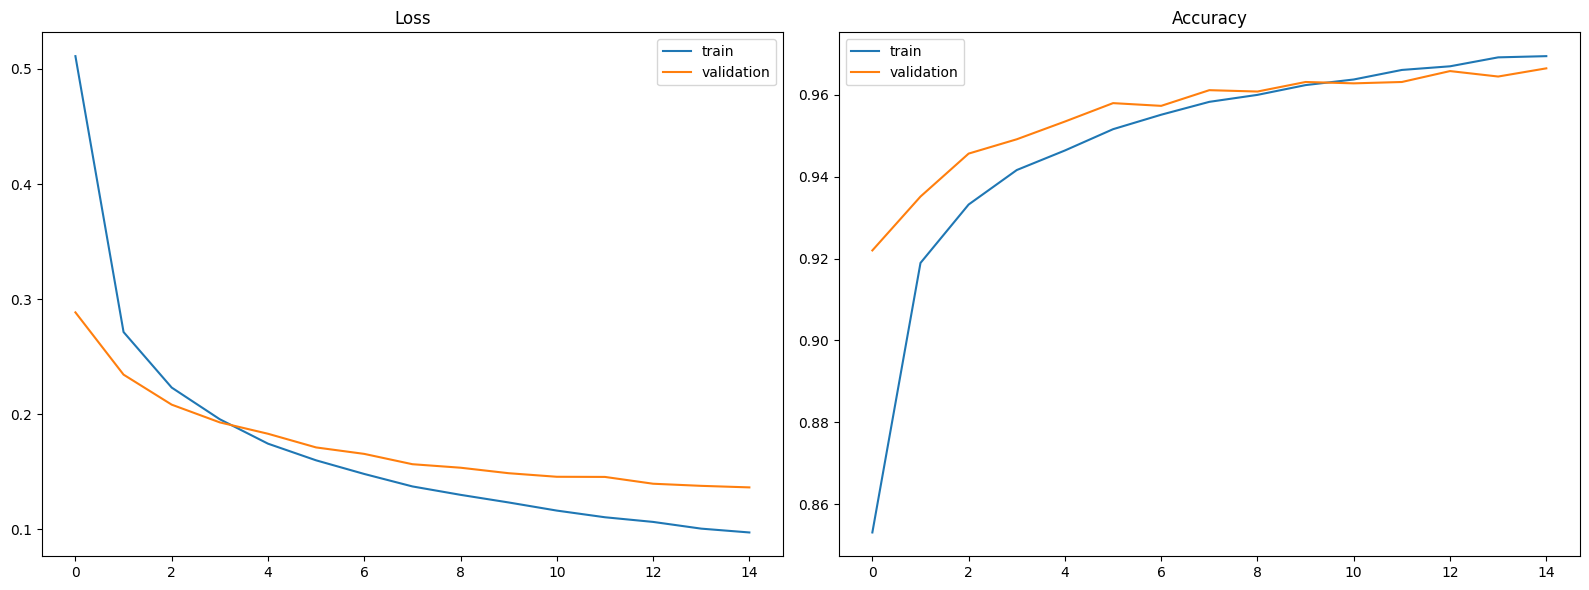

In [15]:
fig, axs = plt.subplots(1,2, figsize=(16,6))

axs[0].plot(history.history['loss'], label='train')
axs[0].plot(history.history['val_loss'], label='validation')
axs[0].set_title('Loss')
# axs[0].set_ylim(0, 1)
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='train')
axs[1].plot(history.history['val_accuracy'], label='validation')
axs[1].set_title('Accuracy')
axs[1].legend()

plt.tight_layout();

In [16]:
test_loss, test_accuracy = model.evaluate(ts_images_scaled, ts_labels)
test_loss, test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.1254 - accuracy: 0.9681


(0.1254444122314453, 0.9681000113487244)

In [ ]:
# Get the weights for each layer
for i, layer in enumerate(model.layers):
    weights = layer.get_weights() 
    print(f"Layer {i} weights: {len(weights)}")
    if len(weights)>0:
        print(weights[0].shape, weights[1].shape)

In [17]:
import logging
logging.getLogger("mlflow").setLevel(logging.ERROR)

In [19]:
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]

In [21]:
mlflow.get_tracking_uri()

'file:///C:/Users/ynany/Desktop/Jupyter_Notebooks/GitHub_Projects/Simple_DeepLearning_Projects/minst_handwritten_digit_recognition/mlruns'

In [20]:
# # Define the input signature
# input_signature = tf.TensorSpec(shape=(None, 784), dtype=tf.float32)
# @tf.function(input_signature=[input_signature])
# def predict(x):
#     return {'predictions': model(x)}
# tf.saved_model.save(model, "my_model", signatures={'serving_default': predict})

# Set the MLflow server tracking uri 
# mlflow.set_tracking_uri("http://localhost:5000")

mlflow.set_experiment("MINST_MLP")
with mlflow.start_run() as run:
    # Log a parameter (key-value pair)
    print("Run ID:", run.info.run_id)
    mlflow.log_param("num_nodes", 128)
    mlflow.log_param("dropout", 0.2)

    # Log a metric; metrics can be updated throughout the run
    mlflow.log_metric("training_accuracy", training_accuracy)
    mlflow.log_metric("validation_accuracy", validation_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)

    # Log an sklearn model
    mlflow.keras.log_model(model, "mlp_model")

Run ID: da1f775860c84a96985009fa90c2d1e8
INFO:tensorflow:Assets written to: C:\Users\ynany\AppData\Local\Temp\tmpdezzuiez\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\ynany\AppData\Local\Temp\tmpdezzuiez\model\data\model\assets
